In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset
haberman=pd.read_csv('haberman.csv')
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#Description of each column
haberman['age'].describe()

count    305.000000
mean      52.357377
std       10.678010
min       30.000000
25%       44.000000
50%       52.000000
75%       60.000000
max       78.000000
Name: age, dtype: float64

In [5]:
haberman['year'].describe()

count    305.000000
mean      62.868852
std        3.242783
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: year, dtype: float64

In [6]:
haberman['nodes'].describe()

count    305.000000
mean       4.032787
std        7.200528
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

In [7]:
haberman['status'].describe()

count    305.000000
mean       1.262295
std        0.440605
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: status, dtype: float64

In [14]:
haberman.status[haberman.status==1].count()
haberman.status[haberman.status==2].count()
#85 cancer patients, 225 non cancer patients

225

In [21]:
# Seperating cancer and non-cancer patients
cancer_group=haberman.groupby('status')
cancer_group.get_group(2).describe()
# No cancer patients 
#Info gathered from below:
#1: 80 patients died with cancer after surgery
#2: mean age of dead patients=53.31
#3: minimum age: 34
#4: max age: 78
#5: mean nodes: 7.5

--------------------------


,age,year,nodes,status
count,80.000000,80.000000,80.000000,80.0
mean,53.312500,62.887500,7.525000,2.0
std,9.677841,3.318509,9.222942,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.750000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.250000,2.0
max,78.000000,69.000000,52.000000,2.0


In [26]:
# Cancer Patients data
cancer_group.get_group(1).describe()
# cancer patients 
#Info gathered from below:
#1: 225 patients survived with cancer after surgery
#2: mean age of survived patients=52.01
#3: minimum age: 30
#4: max age: 77
#5: mean nodes: 2.79

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


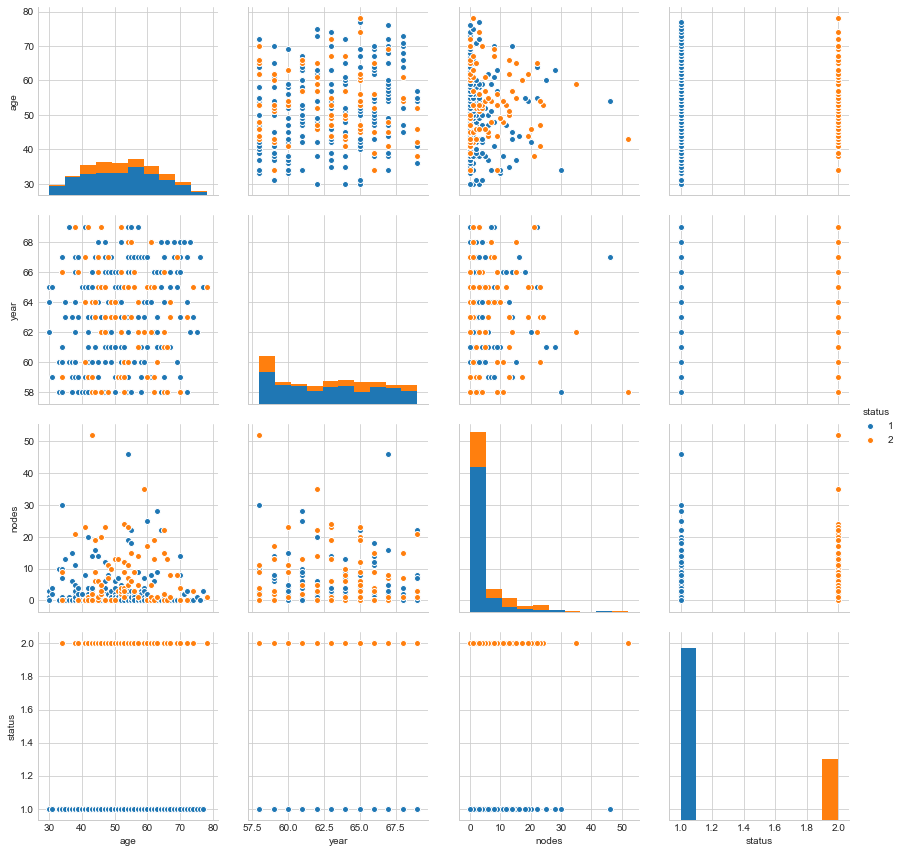

In [30]:
#Bivariate analysis with 2D-pair plots
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='status',size=3)
plt.show()
#Data well spread, cannot be classified with just if-else statement

C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


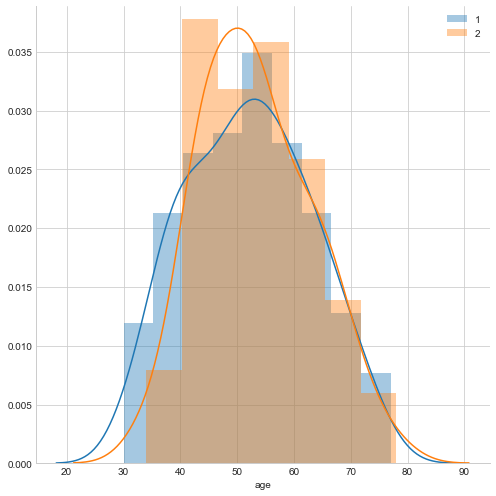

In [47]:
#1-D data analysis (Univariate)
#AGE
sns.FacetGrid(haberman,hue='status',size=7).map(sns.distplot,"age")
plt.legend()
plt.show()
#Observations: Maximum number of patients who have cancer are in age 40-60
#We cannot use age as a factor to predict if a person will live or die

C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


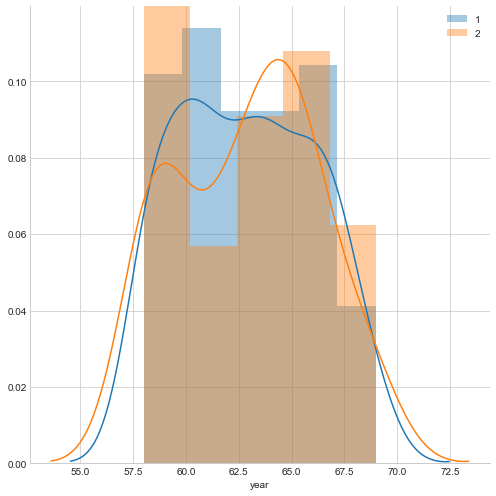

In [48]:
#1-D data analysis (Univariate)
#AGE
sns.FacetGrid(haberman,hue='status',size=7).map(sns.distplot,"year")
plt.legend()
plt.show()
#Observations: Maximum number of patients who come for surgery are in age 57-67
#We cannot use year as a factor to predict if a person will live or die
# Patients getting surgery at age 65 show better survival results

C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


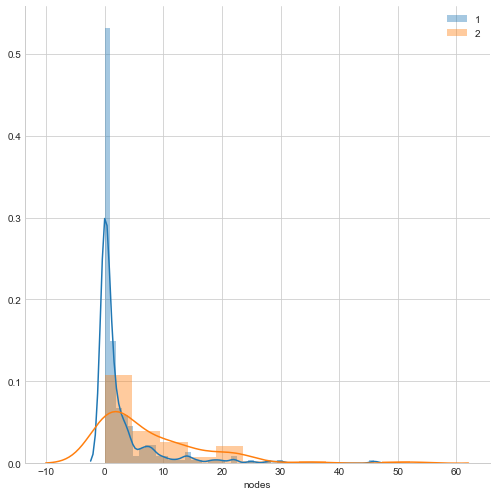

In [50]:
#1-D data analysis (Univariate)
#AGE
sns.FacetGrid(haberman,hue='status',size=7).map(sns.distplot,"nodes")
plt.legend()
plt.show()
#Observations: Patients who survive the surgery have fewer nodes than who don't survive
#more than 50% patients who survived have 0-1 nodes
# 11% patients who do no survive have 0-1 nodes

<function matplotlib.pyplot.show(*args, **kw)>

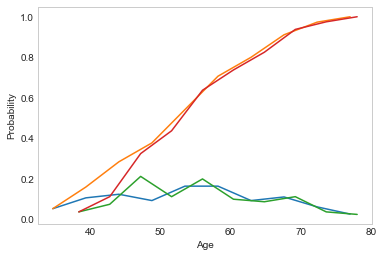

In [55]:
#PDF vs CDF curve
#Segregating data based on class
haberman_c=haberman[haberman.status==1]
haberman_nc=haberman[haberman.status==2]

# This PDF and CDF are for Cancer and non-Cancer patient's age only
counts,bin_edges=np.histogram(haberman_c["age"],bins=10,density=True)
pdf=counts/sum(counts)

#Computing CDF from PDF
cdf=np.cumsum(pdf)  # cumsum: cumulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show


# This PDF and CDF are for non-Cancer patient's age only
counts,bin_edges=np.histogram(haberman_nc["age"],bins=10,density=True)
pdf=counts/sum(counts)

#Computing CDF from PDF
cdf=np.cumsum(pdf)  # cumsum: cumulative sum
plt.xlabel('Age')
plt.ylabel('Probability')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
plt.show
#Age cannot be the differentiator for person surviving and not surviving

<function matplotlib.pyplot.show(*args, **kw)>

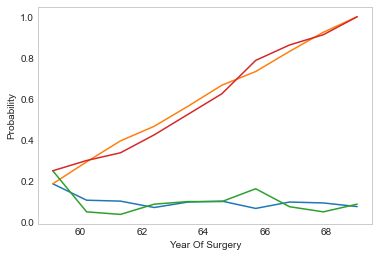

In [58]:
# This PDF and CDF are for Cancer and non Cancer patient's Year of surgery only
counts,bin_edges=np.histogram(haberman_c["year"],bins=10,density=True)
pdf=counts/sum(counts)

#Computing CDF from PDF
cdf=np.cumsum(pdf)  # cumsum: cumulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show


# This PDF and CDF are for non-Cancer patient's age only
counts,bin_edges=np.histogram(haberman_nc["year"],bins=10,density=True)
pdf=counts/sum(counts)

#Computing CDF from PDF
cdf=np.cumsum(pdf)  # cumsum: cumulative sum
plt.xlabel('Year Of Surgery')
plt.ylabel('Probability')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
plt.show
#Year of surgery cannot be the differentiator for person surviving and not surviving

<function matplotlib.pyplot.show(*args, **kw)>

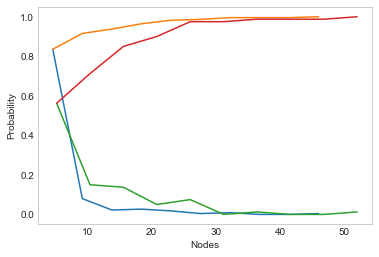

In [59]:
# This PDF and CDF are for Cancer patient's Year of surgery only
counts,bin_edges=np.histogram(haberman_c["nodes"],bins=10,density=True)
pdf=counts/sum(counts)

#Computing CDF from PDF
cdf=np.cumsum(pdf)  # cumsum: cumulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show


# This PDF and CDF are for non-Cancer patient's age only
counts,bin_edges=np.histogram(haberman_nc["nodes"],bins=10,density=True)
pdf=counts/sum(counts)

#Computing CDF from PDF
cdf=np.cumsum(pdf)  # cumsum: cumulative sum
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
plt.show
#Most of the nodes are less than 10.
#But mostly for non-cancer patients(about 85%) and 55% for cancer patients
# End of univariate analysis

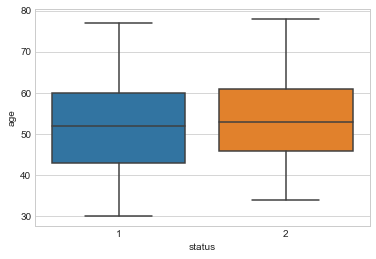

In [61]:
# Bi-variate Analysis
#BOXPLOTS-2D status vs age
sns.boxplot(x='status',y='age',data=haberman)
plt.show()
#People dying of cancer after surgery have slightly higher age than people surviving

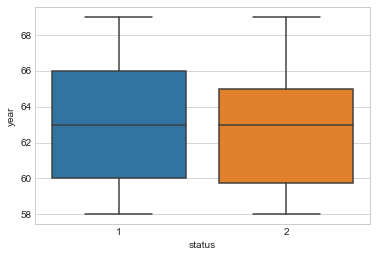

In [64]:
#BOXPLOTS-2D status vs year
sns.boxplot(x='status',y='year',data=haberman)
plt.show()
#People dying of cancer got their surgery mostly between 60-63 age
#People survivng of surgery got their surgery mostly between 60-66

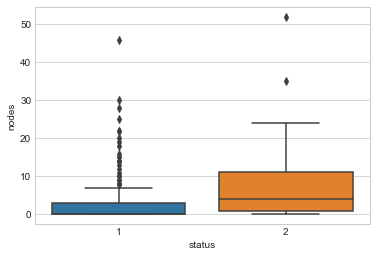

In [65]:
#BOXPLOTS-2D status vs year
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()
#People dying of cancer got higher nodes(more than 2)

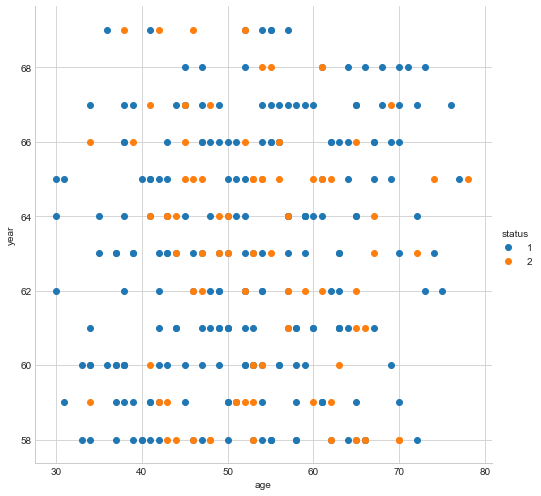

In [76]:
#Scatterplots -2D Age vs year of surgery
sns.FacetGrid(haberman,hue='status',size=7).map(plt.scatter,'age','year').add_legend()
plt.show()

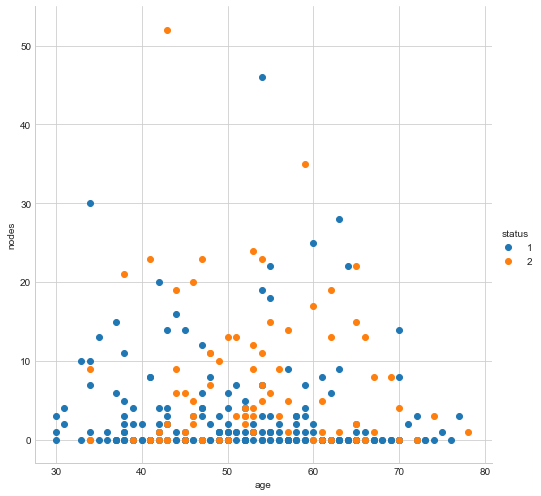

In [77]:
#Scatterplots -2D Age vs nodes
sns.FacetGrid(haberman,hue='status',size=7).map(plt.scatter,'age','nodes').add_legend()
plt.show()
#more the number of nodes lesser the survival probability(resheck this fact)

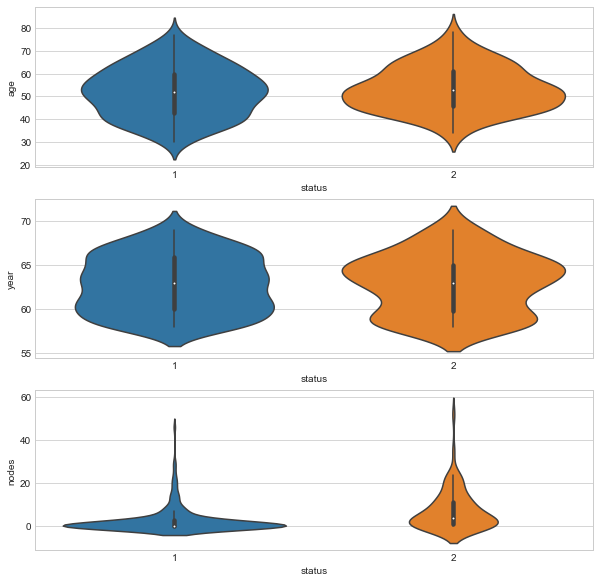

In [88]:
# Violin Plots for 2-D data analysis
plt.figure(figsize=(10,10))#Adding fugure size
plt.subplot(311)
sns.violinplot(x="status",y="age",data=haberman)
plt.subplot(312)
sns.violinplot(x="status",y="year",data=haberman)
plt.subplot(313)
sns.violinplot(x="status",y="nodes",data=haberman)

C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


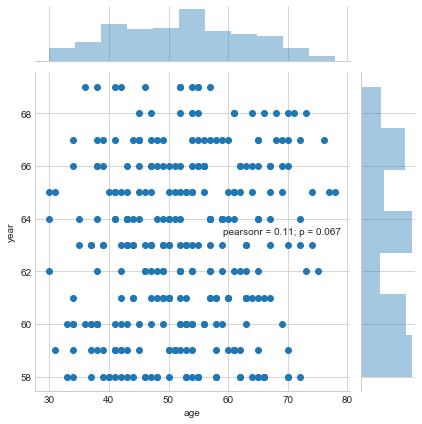

In [90]:
#Contour Plot for 2-d analysis
sns.jointplot(x="age",y="year",data=haberman)
plt.show()

C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


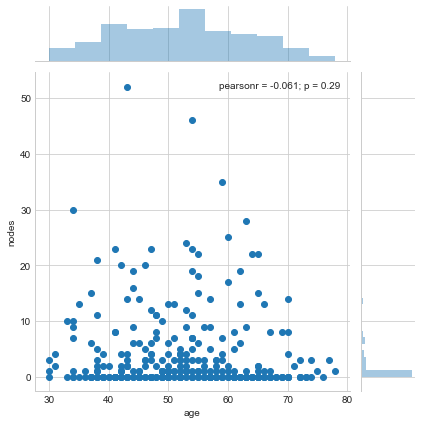

In [91]:
sns.jointplot(x="age",y="nodes",data=haberman)
plt.show()


C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


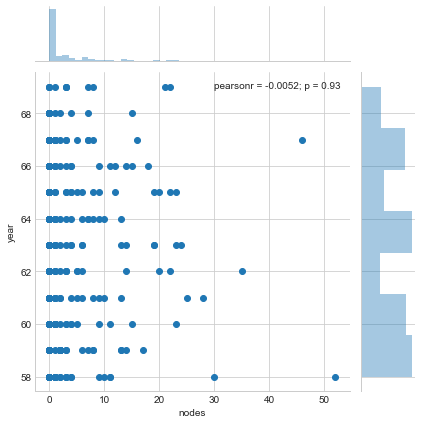

In [92]:
sns.jointplot(x="nodes",y="year",data=haberman)
plt.show()
#same observations. Consider this as confirmation of observations.